Week 2 – Day 1: Linear Regression

Objective of the day
Understand and implement linear regression — the simplest predictive model. By the end, you’ll:

Fit a regression line.

Evaluate predictions.

Visualize results.

🟢 What is Linear Regression?

Linear regression tries to model the relationship between one or more inputs (X) and a continuous output (y) with a straight line (or hyperplane in higher dimensions).

In your case:

Input (X) = Median Income (MedInc) of a neighborhood.

Output (y) = Median House Value (MedHouseVal).

The model learns an equation of the form:

𝑦 = 𝑏_0 + 𝑏_1⋅𝑥

b_0 = intercept

b_1 = coefficient (slope)

🟡 What the results mean
1. Coefficient (model.coef_)

This is the slope of the line.

It tells you: “For every 1 unit increase in Median Income, how much does the Median House Value change?”

If it’s positive → higher income → higher house value.

If it’s negative → higher income → lower house value (unlikely here).

So if the coefficient = 0.45, it means:

For each additional $1,000 of median income, the median house value increases by about $45,000 (since the dataset is scaled).

2. Intercept (model.intercept_)

This is the baseline house value when MedInc = 0.

It’s where the regression line crosses the y-axis.

Not very meaningful in practice (nobody has income = 0), but mathematically it anchors the line.

3. MSE (Mean Squared Error)

MSE= 1/n * ∑(y_true − y_pred)^2

Measures the average squared difference between actual house values and predicted ones.

Smaller is better (closer predictions).

Squaring penalizes large errors more heavily.

4. R² (R-squared, coefficient of determination)

Explains how much of the variation in house prices can be explained by income.

Value between 0 and 1:

0 = model explains nothing (bad).

1 = model perfectly explains everything.

Example: R² = 0.48 means 48% of the variance in house prices can be explained by median income.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

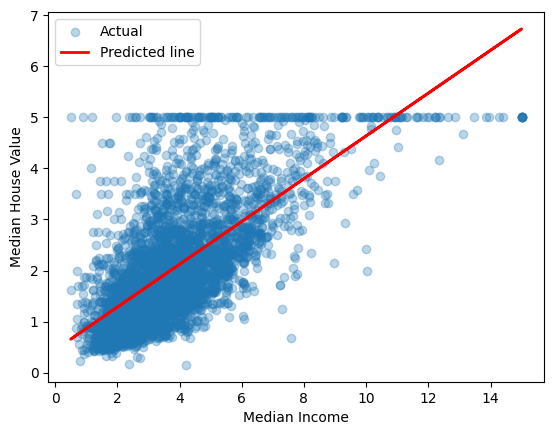

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(df.head())
print(df.describe())

# 2. Train/Test split

X = df[["MedInc"]]   # median income
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train linear regression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

#Visualize regression line

plt.scatter(X_test, y_test, alpha=0.3, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()



📊 Exercise of the Day

Report the R² score → how much variance is explained by income?

Look at the coefficient → what does it mean in plain words about the relationship between income and house value?

Try adding population ("Population") as a second feature. Does R² improve?

1) Only 45.8% of variance can be explained by house income.

2) For every 1 unit increase in house income the median house value increases by 0.419

3) WIth population the R2 feature stays practically the same 0.459.

🌟 Mini-Challenge

Train two models:

Model A → only "MedInc"

Model B → "MedInc" + "AveRooms"

Compare R² scores. Which feature adds more predictive power?

In [7]:
X = df[["MedInc",  "AveRooms"]]   # median income
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train linear regression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Coefficient: [ 0.43626089 -0.04017161]
Intercept: 0.5972677793933254
MSE: 0.7021550469058007
R²: 0.4641710652437856
